# COVID-19 History in Georgia Visualization

*Data from http://covidtracking.com*

In [4]:
import pandas as pd
import numpy as np
import io, os
import requests
import scipy

url = "https://covidtracking.com/data/download/georgia-history.csv"

s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))



After reading the data in, let's do some basic cleansing of the data.

In [3]:
# Sort the data by date
df = data.sort_values(by=['date'], ascending=True)

# Drop columns which don't interest us.
df.drop(columns=["state"], inplace=True)

# Ensure that the date is unique
df["date"].is_unique

True

Now we'll set the index of the data frame to the date.

In [4]:
df

,date,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
368,2020-03-04,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0
367,2020-03-05,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0
366,2020-03-06,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0
365,2020-03-07,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0
364,2020-03-08,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-03-03,17625.0,15349.0,145,2276.0,56369.0,56369.0,2299.0,118,9186.0,...,7251427,16983,478229.0,1437822.0,NaN,NaN,NaN,0,7251427,16983
3,2021-03-04,17750.0,15462.0,125,2288.0,56512.0,56512.0,2191.0,143,9221.0,...,7279616,28189,479300.0,1451169.0,NaN,NaN,NaN,0,7279616,28189
2,2021-03-05,17815.0,15526.0,65,2289.0,56627.0,56627.0,2099.0,115,9236.0,...,7315477,35861,480456.0,1463362.0,NaN,NaN,NaN,0,7315477,35861
1,2021-03-06,17905.0,15597.0,90,2308.0,56762.0,56762.0,2071.0,135,9260.0,...,7340242,24765,481545.0,1478232.0,NaN,NaN,NaN,0,7340242,24765


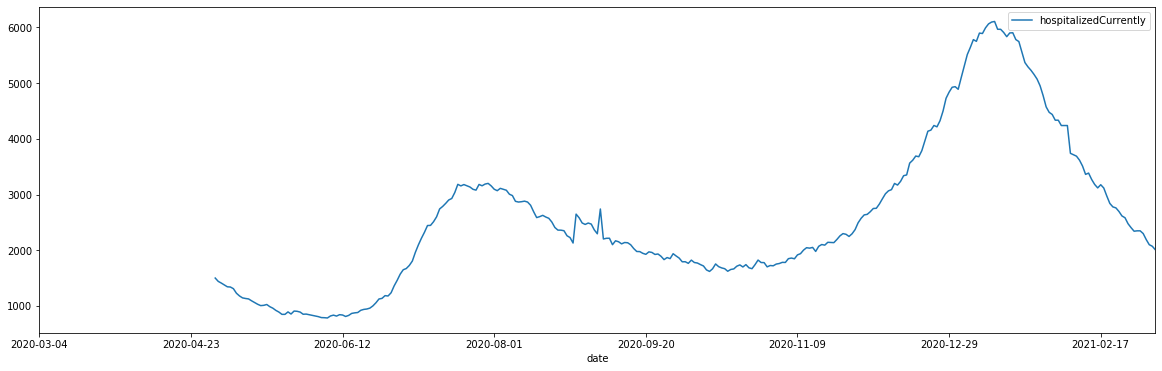

In [5]:
df.plot(x='date', y='hospitalizedCurrently', figsize=(20,6))

The above data is taken from [https://covidtracking.com/data/state/georgia](https://covidtracking.com/data/state/georgia)

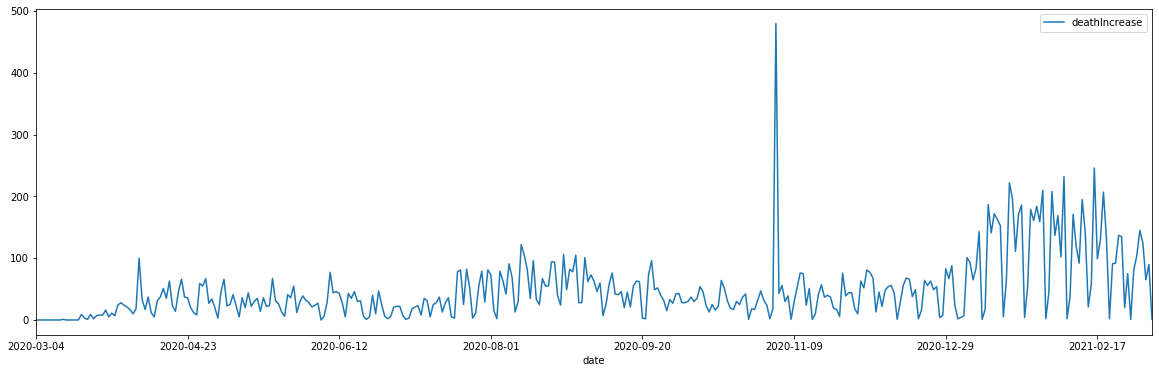

In [6]:
deaths = df.loc[:,('date', 'deathIncrease')]

deaths.sort_values(by=['date'], ascending=True, inplace=True)

deaths.plot(x='date', y='deathIncrease', figsize=(20,6))

OK - There's clearly an outlier there. Let's filter out values by quintile:

In [7]:
q = deaths["deathIncrease"].quantile(.999)
q

393.8880000000145

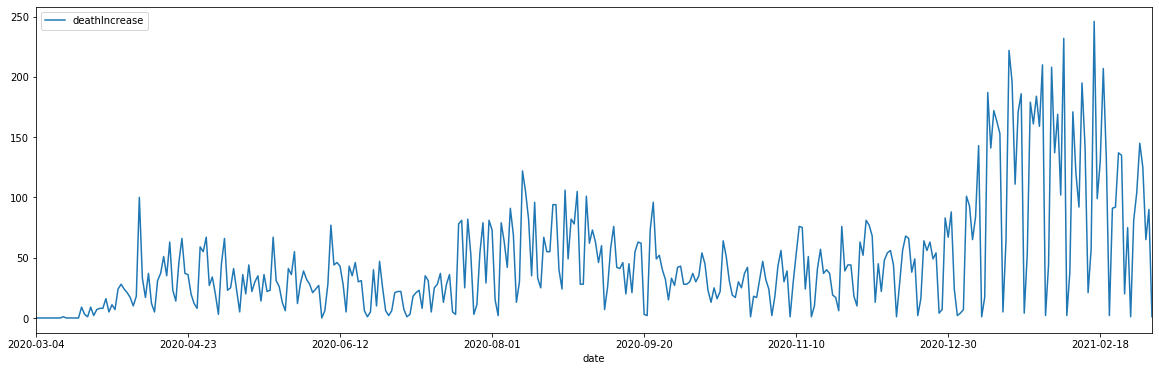

In [8]:
deaths_filtered = deaths[deaths["deathIncrease"] < q]
deaths_filtered.plot(x='date', y='deathIncrease', figsize=(20,6))

Extra Credit - the following plot isn't working correctly. Can you fix it?

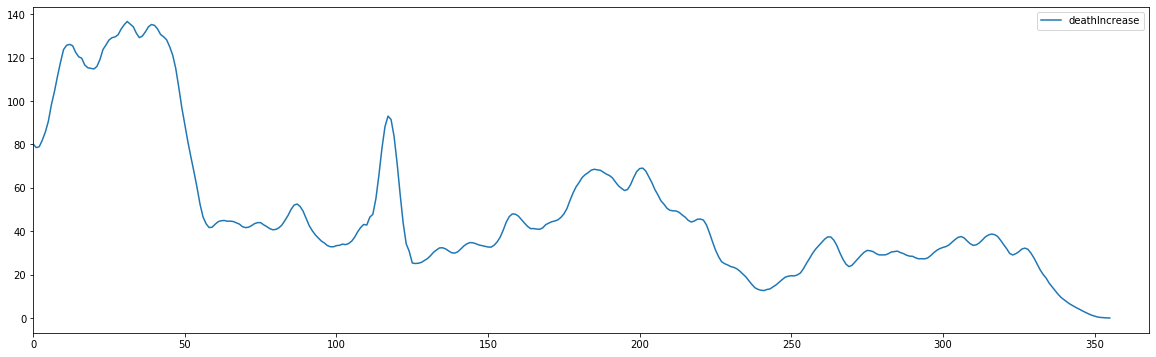

In [9]:
deaths.rolling(14,win_type='hamming').mean().plot(figsize=(20,6))

In [7]:
import boto3, wget

s3_region = '' # fill in for AWS, blank for Ceph
s3_endpoint_url = 'http://ceph-nano-0'
s3_access_key_id = os.getenv('AWS_ACCESS_KEY_ID')
s3_secret_access_key = os.getenv('AWS_SECRET_ACCESS_KEY')
s3_bucket = 'georgia-history'


# configure boto S3 connection
s3 = boto3.client('s3',
                  s3_region,
                  endpoint_url = s3_endpoint_url,
                  aws_access_key_id = s3_access_key_id,
                  aws_secret_access_key = s3_secret_access_key)


TA9TYEX3SGFIN0RFSPFQ
wSnnSvAb0sKwKX4jtxWEpFcwjRcMVIUdHpAZApEt


NameError: name 'boto3' is not defined

In [14]:
url =  "https://covidtracking.com/data/download/georgia-history.csv"
file = wget.download(url=url, out='georgia-history.csv')
s3.create_bucket(Bucket=s3_bucket)
s3.upload_file(file, s3_bucket, "georgia-history.csv")


ClientError: An error occurred (InvalidAccessKeyId) when calling the CreateBucket operation: Unknown